In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Next, we read the csv file into a Pandas dataframe using the function read_csv() from the Pandas library.

In [3]:
# Reading the dataset
file_path = r"C:\Users\SHALINI\Downloads\Bollywood-Movie-Dataset-main\Bollywood-Movie-Dataset-main\IMDB-Movie-Dataset(2023-1951).csv" 
df = pd.read_csv(file_path)

#### After reading the dataset, we view the first few rows of the dataframe using the head() function from the Pandas library.

In [4]:
# viewing the first few rows of the dataset
# the head() function displays the first 5 rows of the dataframe
df.head()

,Unnamed: 0,movie_id,movie_name,year,genre,overview,director,cast
0,0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ..."
1,1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ..."
2,2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S..."
3,3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana..."
4,4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa..."


### Q1. How many records are present in the dataset?
To solve Question 1, we use the shape attribute of a Pandas dataframe and check the number of rows by using index 0.

In [5]:
# 1. number of records in the dataset
df.shape[0]

2199

As we can see, there are 2199 records in the dataset.

### Q2. How many movies were released in each year? Sort number of releases in Release Time in descending order.

To solve Question 2, we use the function value_counts() from the Pandas library on the ReleaseTime column. The function automatically sorts the counts in descending order.

In [8]:
# 2. finding the number of movies by year sorted in the descending order
df.year.value_counts()

year
2023      193
2022      130
2019       94
2018       91
2021       85
         ... 
XV2016      1
V2023       1
1951        1
XXX         1
XXV         1
Name: count, Length: 84, dtype: int64

### 1. Data Cleaning
#### Remove duplicate rows based on 'movie_id' (assuming it's unique)

In [12]:
df = df.drop_duplicates(subset='movie_id', keep='first')

### 2. Handle Missing Values (if any)
#### Example: Fill missing values in 'director' with 'Unknown'

In [13]:
df['director'].fillna('Unknown', inplace=True)

### 3. Data Type Conversion
#### Ensure 'year' is of integer type

In [18]:
# Drop rows with invalid year values
df = df[pd.to_numeric(df['year'], errors='coerce') .notnull()]  # Drop rows with non-numeric or invalid values

In [19]:
# Ensure 'year' is of integer type
df['year'] = df['year'].astype(int)

### 4. Check the current data type of 'year'

In [21]:
print(df['year'].dtype)

int32


### 5. Clean 'genre' column (remove extra spaces, split)

In [23]:
df['genre'] = df['genre'].str.strip().str.split(',')

### 6. Clean 'cast' column (remove extra spaces, split)

In [24]:
df['cast'] = df['cast'].str.strip().str.split(',')

### 7. Create 'cast_size' feature

In [25]:
df['cast_size'] = df['cast'].apply(len)

### # 8. Analysis 

#### 1. Which movie has the highest number of actors in the cast?

In [26]:
movie_with_largest_cast = df.loc[df['cast_size'].idxmax(), 'movie_name']
print(f"\nMovie with the largest cast: {movie_with_largest_cast}")


Movie with the largest cast: Jawan


#### 2. Which genre has the most movies released in the dataset?

In [27]:
most_frequent_genre = df['genre'].explode().value_counts().idxmax()
print(f"\nMost frequent genre: {most_frequent_genre}")


Most frequent genre:  Drama


#### 3. Which year had the highest number of movie releases?

In [28]:
year_with_most_releases = df['year'].value_counts().idxmax()
print(f"\nYear with the highest number of movie releases: {year_with_most_releases}")


Year with the highest number of movie releases: 2023


#### 4. Which director has the most movies released in the dataset?

In [29]:
most_prolific_director = df['director'].value_counts().idxmax()
print(f"\nDirector with the most movies: {most_prolific_director}")


Director with the most movies: David Dhawan


#### 5. What are the top 5 most frequent actor names in the cast?

In [30]:
top_actors = df['cast'].explode().value_counts().head(5)
print("\nTop 5 most frequent actors:\n", top_actors)


Top 5 most frequent actors:
 cast
Amitabh Bachchan    87
Akshay Kumar        80
Salman Khan         52
 Paresh Rawal       49
 Anupam Kher        48
Name: count, dtype: int64


#### 6. total movies released in each year?

In [34]:
yearly_release_counts = df['year'].value_counts().sort_index()
print("Total movies released in each year:\n", yearly_release_counts)


Total movies released in each year:
 year
1932      1
1951      1
1953      1
1954      2
1955      4
       ... 
2022    130
2023    193
2024     31
2025      2
2026      1
Name: count, Length: 76, dtype: int64


#### 7. Movies of each director

In [35]:
director_movie_counts = df['director'].value_counts()
print("\nMovies of each director:\n", director_movie_counts)


Movies of each director:
 director
David Dhawan        28
Ram Gopal Varma     21
Priyadarshan        20
Anurag Kashyap      17
Mahesh Bhatt        17
                    ..
Govind Moonis        1
Kamal Sadanah        1
Vivek Soni           1
Akhilesh Jaiswal     1
Stanley D'Costa      1
Name: count, Length: 1037, dtype: int64


### Visualizing the results of analysis

#### 1. Total Movies Released in Each Year

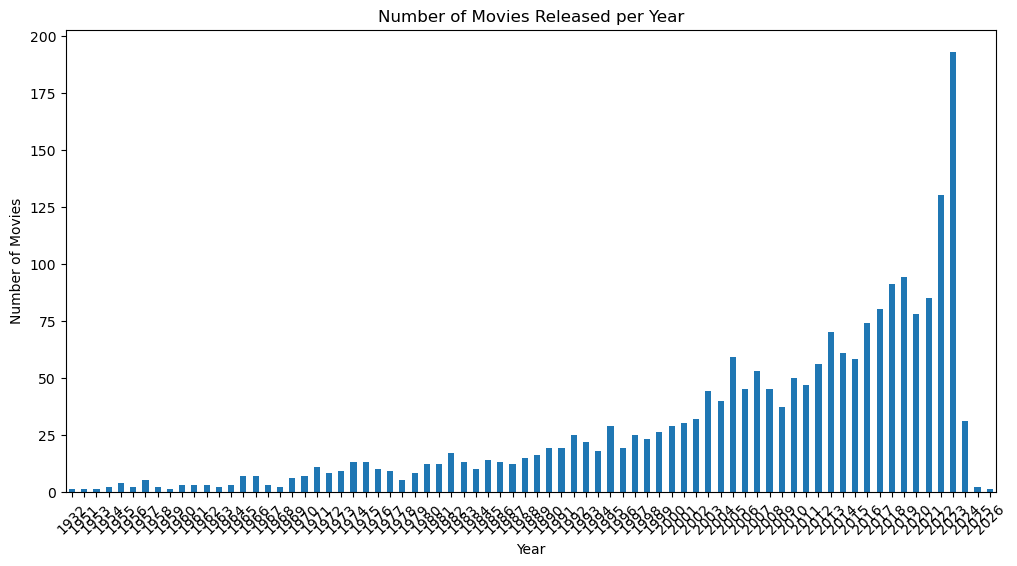

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
yearly_release_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released per Year")
plt.xticks(rotation=45) 
plt.show()

#### 2. Movies of Each Director (Top 15 for better visualization)

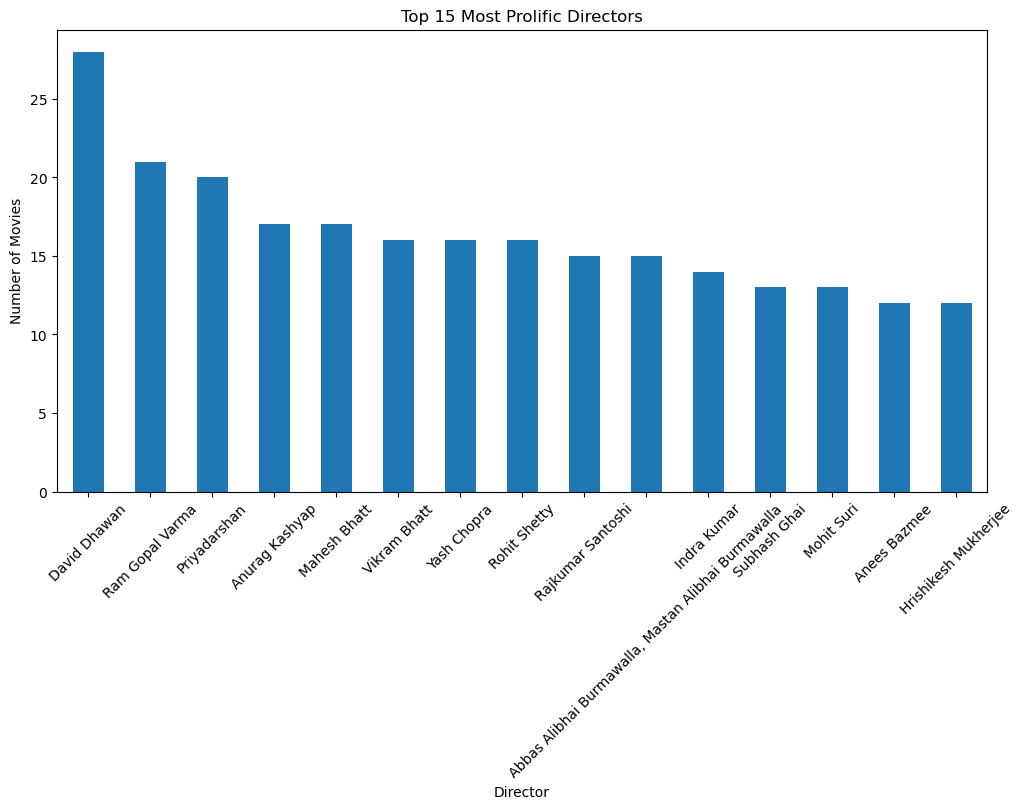

In [37]:
top_directors = director_movie_counts.head(15) 

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar')
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.title("Top 15 Most Prolific Directors")
plt.xticks(rotation=45) 
plt.show()

This will create a bar chart showing the top 15 directors with the highest number of movies in the dataset.

#### 3. Distribution of Movies by Genre (Pie Chart)

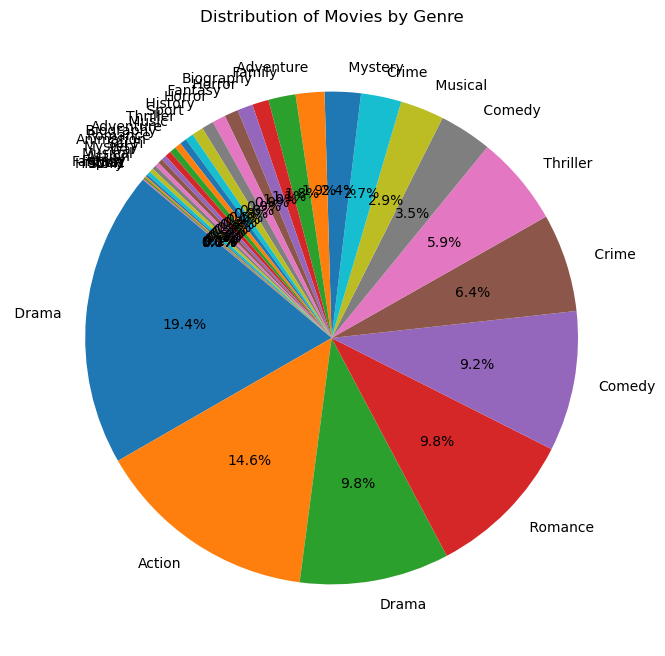

In [38]:
genre_counts = df['genre'].explode().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Movies by Genre")
plt.show()

### Conclusion

This analysis provides a preliminary overview of the Bollywood movie dataset. Key findings include:

Year-wise Trends: The number of movie releases has fluctuated over the years, with some years seeing a higher number of releases than others.
Director Popularity: A few directors have consistently released a higher number of movies, indicating their prominence in the industry.
Genre Distribution: Drama appears to be a frequent genre, suggesting its popularity among filmmakers and audiences.